<a href="https://colab.research.google.com/github/SonolaMoyo/HamoyeSummer2022/blob/main/StageB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [3]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)

In [4]:
from pandas.core.common import random_state
simple_linear_reg = df[['Relative_Compactness', 'Cooling_Load']]

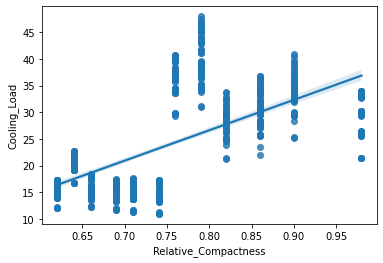

In [5]:
#Plot an regressive plot
sns.regplot(x="Relative_Compactness", y='Cooling_Load', data=simple_linear_reg)

***Train a Regression Model***

In [6]:
#firstly we normalise our dataset to a common scale using the min max scalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
normalised_df = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
featured_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [7]:
#now we split our dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(featured_df, heating_target, test_size=0.3, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
#fit the model with the training dataset
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
#obtain prediction
predictions = linear_model.predict(x_test)

***Mean Absolute Error***

In [9]:
from sklearn.metrics import mean_absolute_error
mean_abs_err = mean_absolute_error(y_test, predictions)
round(mean_abs_err, 3)

0.063

***Residual Sum of Squares (RSS)***
   model performance

In [10]:
rss = np.sum(np.square(y_test - predictions))
round(rss, 3)

1.823

***Root Mean Square Error (RMSE)***

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)


0.089

***R-Squared*** (model performance)

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
round(r2, 3)

0.893

***Penalization Methods***
1. Rigde Regression
2. Feature Selection: Lasso Regression

In [13]:
#Rigde Regression
from sklearn.linear_model import Ridge
rigde_reg = Ridge(alpha=0.5)
rigde_reg.fit(x_train, y_train)
print(rigde_reg.coef_)

[-0.2834707  -0.06227514  0.10306088 -0.16319198  0.44246749  0.00336858
  0.21244937  0.0290877 ]


In [14]:
#Feature Selection: Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [15]:
#comparing the effects of regularisation 
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [16]:
linear_model_weight = get_weights_df(linear_model, x_train, "Linear Model")
rigde_weight_df = get_weights_df(rigde_reg, x_train, "Rigde Weight")
lasso_weight_df = get_weights_df(lasso_reg, x_train, "Lasso Weight")

In [17]:
final_weights = pd.merge(linear_model_weight, rigde_weight_df, on="Features")
final_weights_df = pd.merge(final_weights, lasso_weight_df, on="Features")

In [18]:
print(final_weights_df)

                    Features  Linear Model  Rigde Weight  Lasso Weight
0               Surface_Area -6.387091e+12     -0.062275      0.000000
1       Relative_Compactness -6.064125e-01     -0.283471     -0.027719
2                Orientation -2.822876e-03      0.003369      0.000000
3  Glazing_Area_Distribution  1.913548e-02      0.029088      0.021431
4               Glazing_Area  2.295933e-01      0.212449      0.206132
5             Overall_Height  3.852539e-01      0.442467      0.463482
6                  Wall_Area  3.725803e+12      0.103061      0.200087
7                  Roof_Area  4.790318e+12     -0.163192     -0.000000
